In [45]:
from __future__ import print_function, division
import os
import sys
import pylab as pl
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import json

Populating the interactive namespace from numpy and matplotlib


In [46]:
#download the data to PUIdata
#load the data
mtarides = np.load(os.getenv("PUIDATA")+"/MTA_Fare.npy")

In [47]:
#data shape
mtarides.shape

(600, 23, 194)

In [48]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [57]:
#sum time series for all stations
mta_sumbystation = np.nansum(mtarides, axis = 0)
#data shape
print (mta_sumbystation.shape)
#sum time series for all ride types
mta_sumbyridetype = np.nansum(mtarides, axis = 1)
#data shape
print (mta_sumbyridetype.shape)

(23, 194)
(600, 194)


# Task 1  

In [40]:
mtarides = mtarides.astype('float') 
#drop nan value
mtarides[mtarides == -1] = np.nan

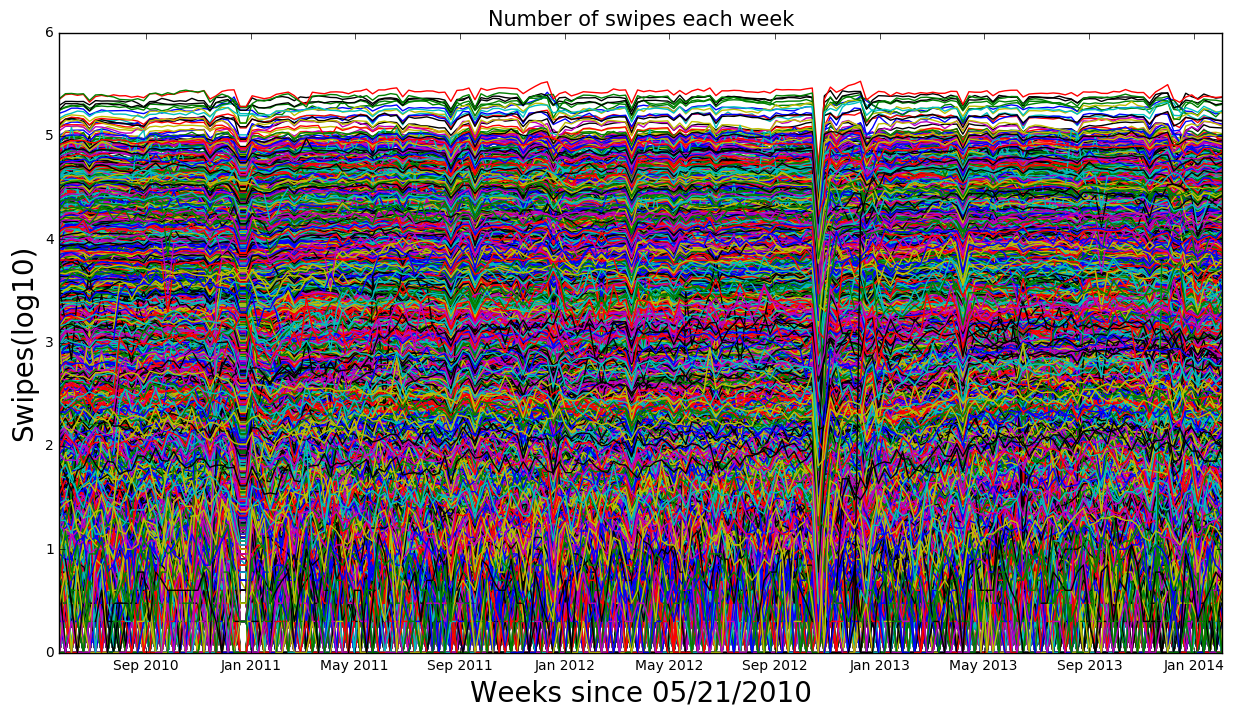

In [85]:
fig = pl.figure(7,figsize=(15,8))
ax = fig.add_subplot(111)
timerange=pd.date_range("05/21/2010","02/08/2014",freq="W")
ax.set_xlabel("Weeks since 05/21/2010", fontsize=20)
ax.set_ylabel("Swipes(log10)", fontsize=20)
ax.set_title("Number of swipes each week", fontsize=15)
for i in range(600):
    for j in range(23):
        ax.plot(timerange,np.log10(mtarides[i][j]))

# Figure1:Number of swipes at each station of each ride type 5/21/2010-2/8/2014

In [58]:
# average of all rides for all a=stations and ride types
averagebystation = np.nanmean(mtarides, axis=0) 
averagebyridetype = np.nanmean(mtarides, axis=1) 
mta_sum = np.nansum(mta_sumbyridetype, axis=0)
mta_sum.shape

(194,)

In [59]:
#threshold by mean and std
ridemean = np.nanmean(mta_sum)
ridestd = np.nanstd(mta_sum)
thresholds = [ridemean + 3 * ridestd, ridemean - 3 * ridestd]

In [60]:
print ("average rides: {:}".format(int(ridemean)))
print ("stdev rides: {:}".format(int(ridestd)))
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(timerange))

average rides: 29778001
stdev rides: 2984034
3-sigma thresholds 38730104.65 20825898.56
earliest datapoint 2010-05-23 00:00:00


In [61]:
indexThresholds = ((mta_sum > thresholds[0]) | (mta_sum < thresholds[1]))
indexbetweenThresholds = ((mta_sum < thresholds[0]) & (mta_sum > thresholds[1]))

In [63]:
timerange[indexbetweenThresholds]

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25',
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=193, freq=None)

In [64]:
timerange[indexThresholds]

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq='W-SUN')

(array([  5000000.,  10000000.,  15000000.,  20000000.,  25000000.,
         30000000.,  35000000.,  40000000.]),
 <a list of 8 Text yticklabel objects>)

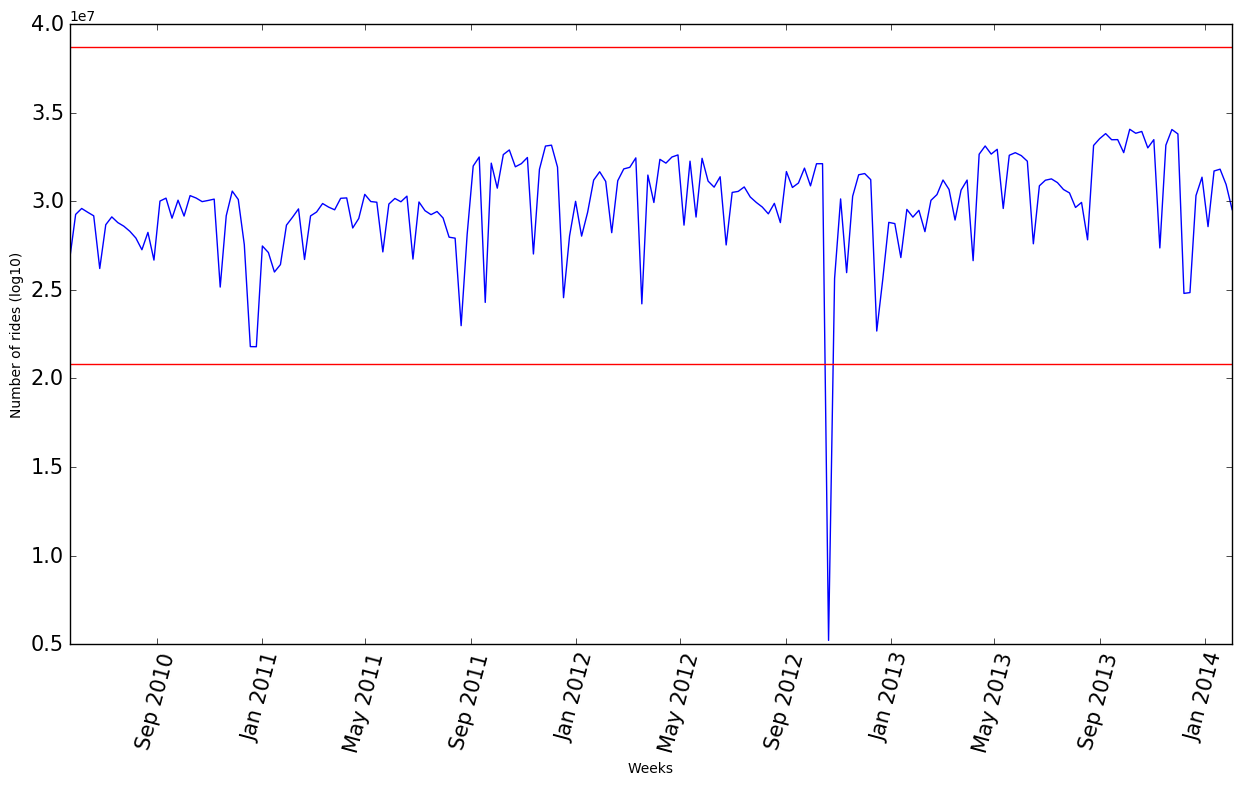

In [65]:
pl.figure(figsize = (15,8))
pl.plot(timerange, mta_sum)
pl.axhline(y = ridemean + 3 * ridestd, color='red', linestyle = '-')
pl.axhline(y = ridemean - 3 * ridestd, color='red', linestyle = '-')
pl.xlabel('Weeks')
pl.ylabel('Number of rides (log10)')
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)

# Figure2:Total number of MTA rides of all ride types per Week 5/21/10-2/21/14

#### The decrease is due to the storm Sandy in October 2012.

# Task 2

In [66]:
df_averagerides = pd.DataFrame()
for i in arange(len(ridetype)):
    df_averagerides[ridetype[i]] = averagebystation[i]
df_averagerides['Date'] = pd.DataFrame(timerange)

In [68]:
for i in ridetype:
    flux = (df_averagerides[i]/df_averagerides[i].sum()).rolling(window=10,center=False).mean()
    fluxratio = flux[9] / flux[-1:]
    print ("the flux ratio beginning to end of {} is {:.3f}".format(i, float(fluxratio.values)))

the flux ratio beginning to end of 10t is 0.979
the flux ratio beginning to end of 14d is 0.799
the flux ratio beginning to end of 1d is 0.900
the flux ratio beginning to end of 2t is 1.071
the flux ratio beginning to end of 30d is 0.967
the flux ratio beginning to end of 7d is 0.720
the flux ratio beginning to end of ada is 1.111
the flux ratio beginning to end of afas is -80.030
the flux ratio beginning to end of exp is -2437.547
the flux ratio beginning to end of ez is -4376.052
the flux ratio beginning to end of ff is 1.222
the flux ratio beginning to end of mc is 0.824
the flux ratio beginning to end of mr is -0.001
the flux ratio beginning to end of month is 1.729
the flux ratio beginning to end of rfm is 1.540
the flux ratio beginning to end of rr is 0.385
the flux ratio beginning to end of sen is 0.343
the flux ratio beginning to end of spec is 0.010
the flux ratio beginning to end of tcmc is 0.652
the flux ratio beginning to end of t is 0.979
the flux ratio beginning to end of

#### Chose ridetype "sen" as the sharpest incresed one and "month" as the sharpest decresed one.

## Incresed rideship

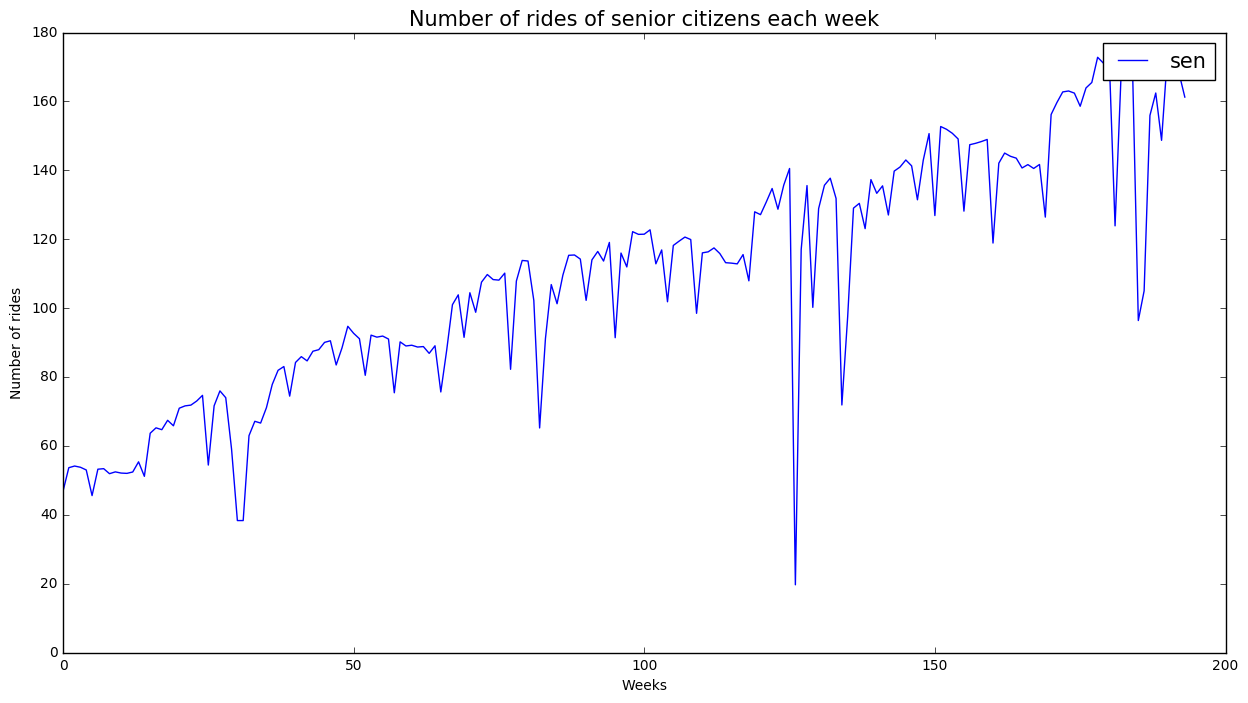

In [86]:
fig = pl.figure(7,figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(df_averagerides["sen"])
ax.set_xlabel("Weeks")
ax.set_ylabel("Number of rides")
ax.legend(fontsize=15)
ax.set_title("Number of rides of senior citizens each week", fontsize=15)

# Figure 3: Number of rides of senior citizens/disabled over 194 weeks

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()


std: 34.616
the flux ratio beginning to end of stud is 0.343


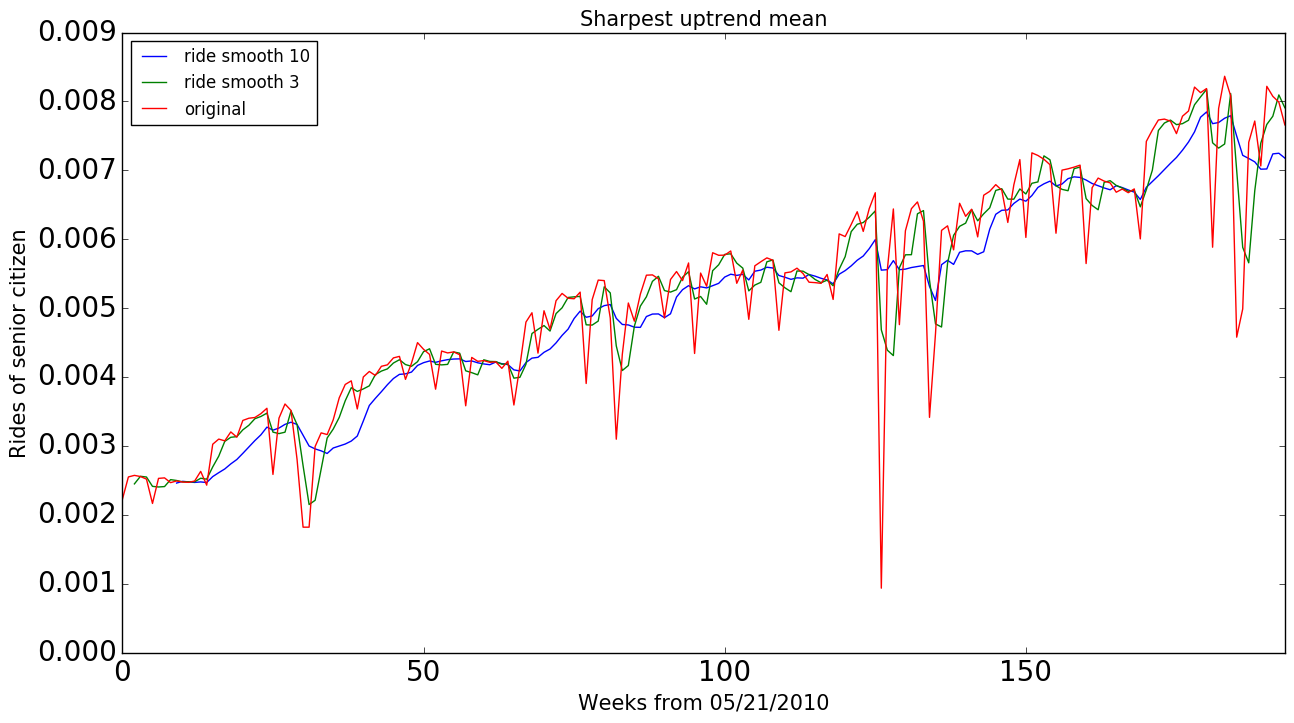

In [77]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(df_averagerides['sen']/df_averagerides['sen'].sum(), 10).plot(fontsize=20, label='ride smooth 10')
ax = pd.rolling_mean(df_averagerides['sen']/df_averagerides['sen'].sum(), 3).plot(fontsize=20, label='ride smooth 3')
ax.set_title("Sharpest uptrend mean", fontsize=15)
pl.xlabel("Weeks from 05/21/2010", fontsize=15)
pl.ylabel("Rides of senior citizen", fontsize=15)
ax.plot(df_averagerides['sen']/df_averagerides['sen'].sum(), label="original")
pl.legend(loc='best')

flux = (df_averagerides['sen']/df_averagerides['sen'].sum()).rolling(window=10,center=False).mean()
fluxratio = flux[9] / flux[-1:]
print ("std: {:.3f}".format(df_averagerides['sen'].std()))
print ("the flux ratio beginning to end of {} is {:.3f}".format(i, float(fluxratio.values)))

# Figure 4 : Sharpest uptrend of senior citizen rideship

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


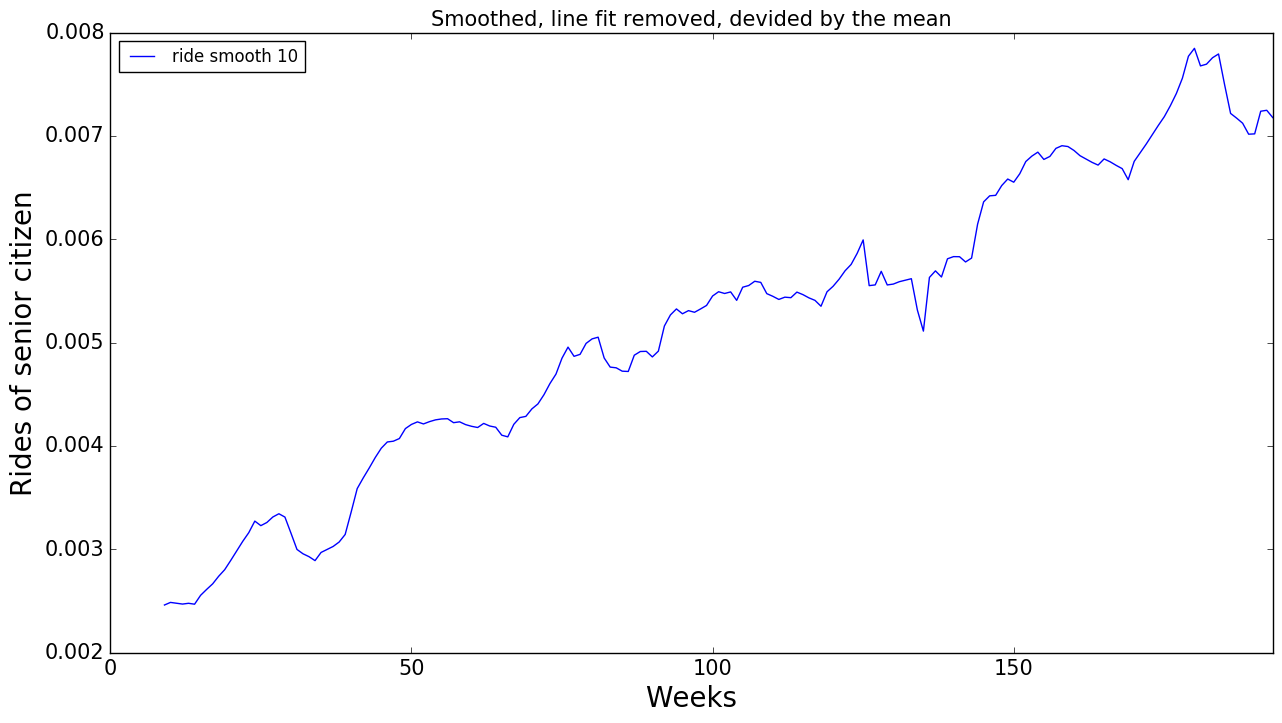

In [78]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(df_averagerides['sen']/df_averagerides['sen'].sum(), 10).plot(fontsize=15, label='ride smooth 10')

ax.set_title("Smoothed, line fit removed, devided by the mean", fontsize=15)
pl.xlabel("Weeks", fontsize=20)
pl.ylabel("Rides of senior citizen", fontsize=20)
pl.legend(loc='best')

# Figure 5 : Smoothed line of senior citizen ridership

## Decresed rideship

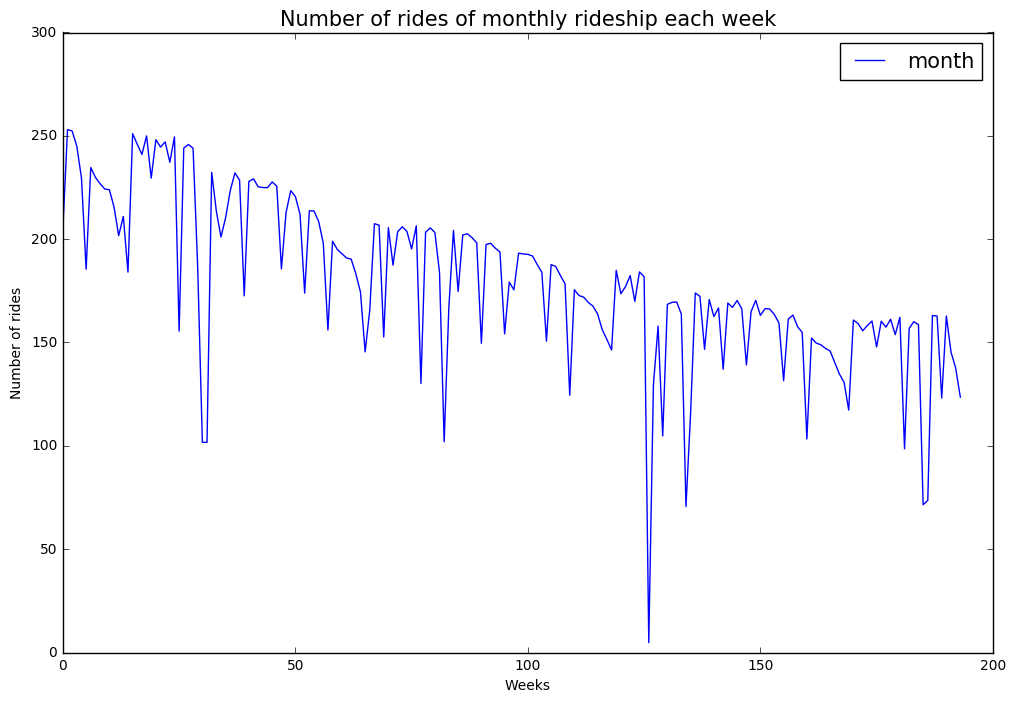

In [87]:
fig = pl.figure(7,figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(df_averagerides['month'])
ax.set_xlabel("Weeks")
ax.set_ylabel("Number of rides")
ax.legend(fontsize=15)
ax.set_title("Number of rides of monthly rideship each week", fontsize=15)

# Figure 6: Number of rides of monthly ridership over 194 weeks

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()


std: 39.674
the flux ratio beginning to end of stud is 0.343


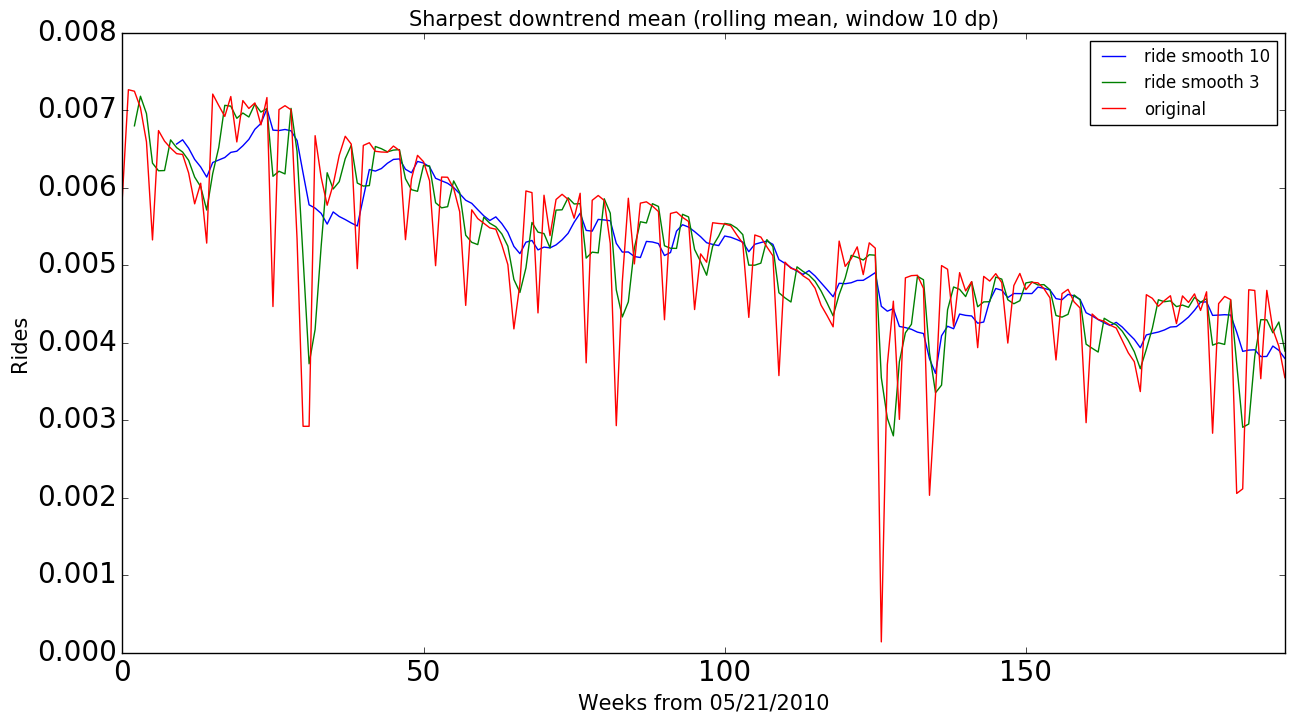

In [82]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(df_averagerides['month']/df_averagerides['month'].sum(), 10).plot(fontsize=20, label='ride smooth 10')
ax = pd.rolling_mean(df_averagerides['month']/df_averagerides['month'].sum(), 3).plot(fontsize=20, label='ride smooth 3')
ax.set_title("Sharpest downtrend mean (rolling mean, window 10 dp)", fontsize=15)
pl.xlabel("Weeks from 05/21/2010", fontsize=15)
pl.ylabel("Rides", fontsize=15)
ax.plot(df_averagerides['month']/df_averagerides['month'].sum(), label="original")
pl.legend(loc='best')

flux = (df_averagerides['month']/df_averagerides['month'].sum()).rolling(window=10,center=False).mean()
fluxRatio = flux[9] / flux[-1:]
print ("std: {:.3f}".format(df_averagerides['month'].std()))
print ("the flux ratio beginning to end of {} is {:.3f}".format(i, float(fluxratio.values)))

# Figure 7: Sharpest downtrend shown by monthly rideship

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()


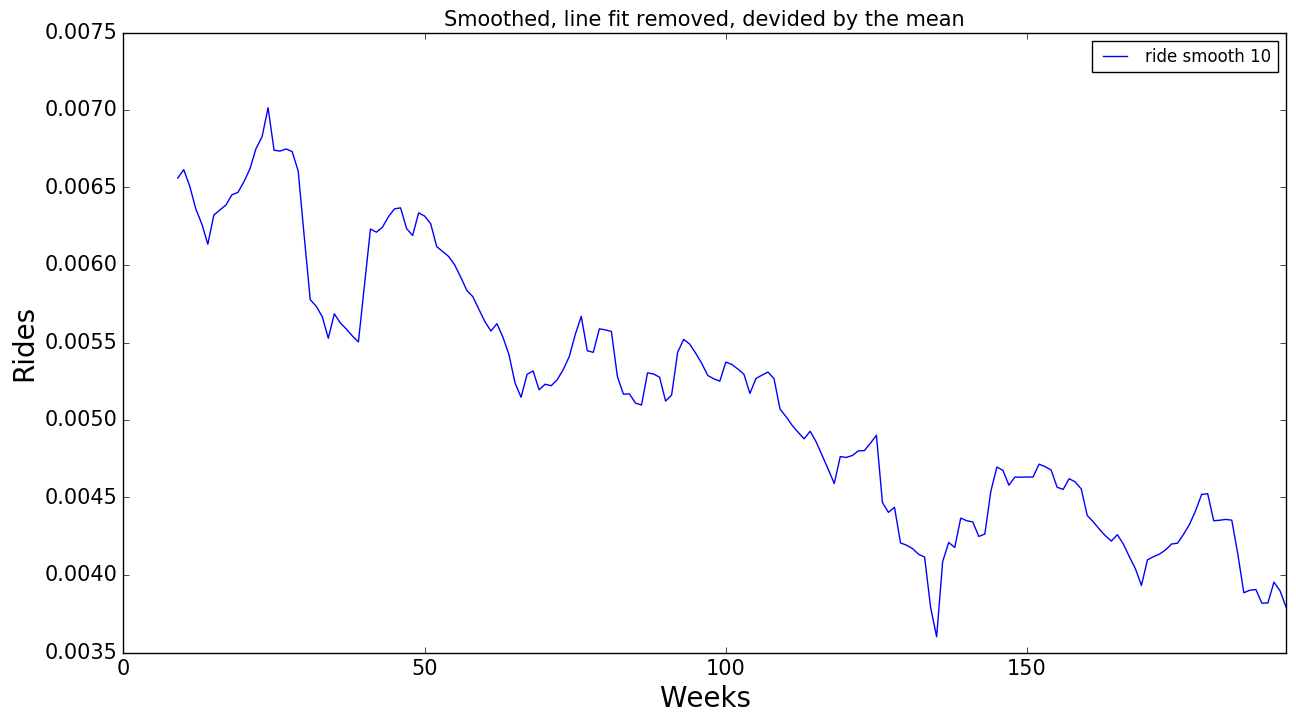

In [83]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(df_averagerides['month']/df_averagerides['month'].sum(), 10).plot(fontsize=15, label='ride smooth 10')

ax.set_title("Smoothed, line fit removed, devided by the mean", fontsize=15)
pl.xlabel("Weeks", fontsize=20)
pl.ylabel("Rides", fontsize=20)
pl.legend(loc='best')

# Figure 8 : Smoothed line of monthly ridership

# Task3

In [88]:
station_allsum = np.nansum(mtarides, axis=1)
station = pd.DataFrame(station_allsum)
station = pd.DataFrame.transpose(station)
station['weeks'] = timerange
station.head()

0      1     2      3      4      5      6      7      8       9  \
0  126877  37305  6605  16377  18563  19986  12448  11090  10481  147186   
1  149476  46463  6880  17407  19902  20624  13643  11658  11029  154825   
2  152382  49358  7228  17594  19947  21224  13718  12036  10880  155957   
3  160174  44848  5730  14241  16075  17411  11459   9808   9122  154913   
4  162640  41508  7031  17588  20282  20908  14093  11943  10922  157627   

     ...      591  592  593  594  595  596  597  598  599      weeks  
0    ...      -23  -23  -23  -23  -23  -23  -23  -23  -23 2010-05-23  
1    ...      -23  -23  -23  -23  -23  -23  -23  -23  -23 2010-05-30  
2    ...      -23  -23  -23  -23  -23  -23  -23  -23  -23 2010-06-06  
3    ...      -23  -23  -23  -23  -23  -23  -23  -23  -23 2010-06-13  
4    ...      -23  -23  -23  -23  -23  -23  -23  -23  -23 2010-06-20  

[5 rows x 601 columns]

In [96]:
allperiods = [1./194, 1./104, 1./52, 1./26, 1./13, 1./8, 1./4, 1./2]

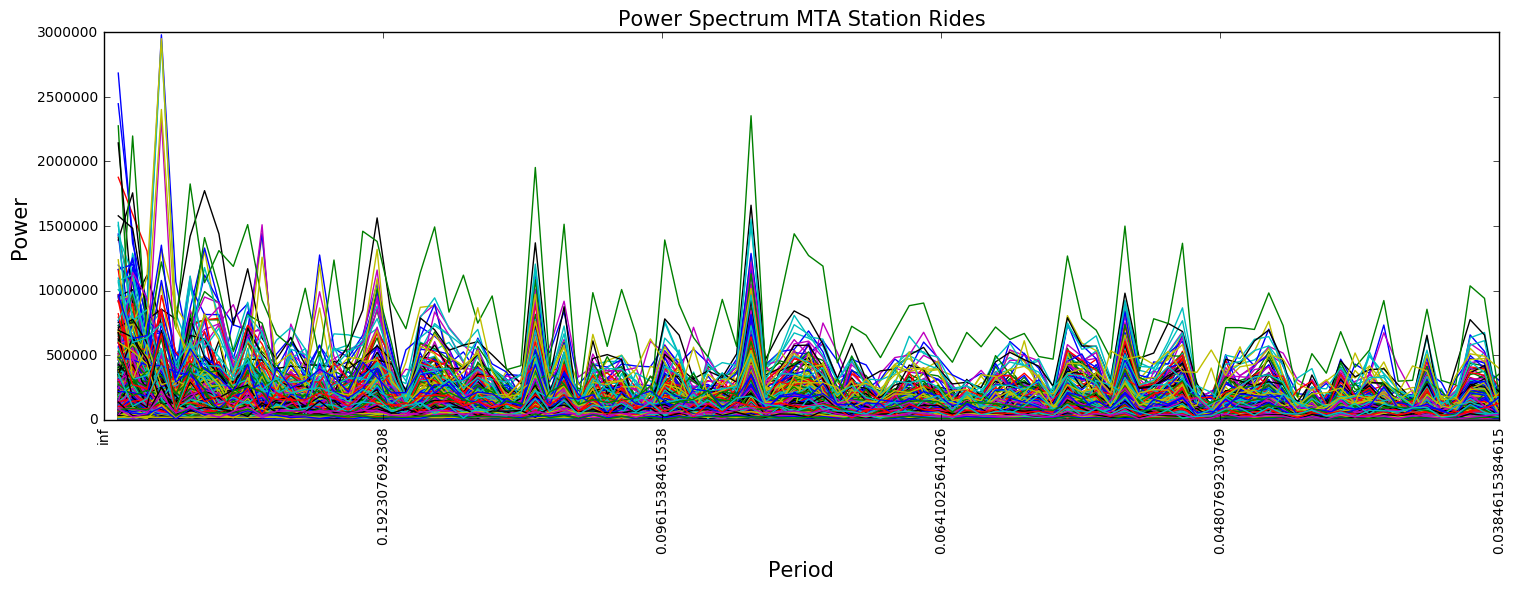

In [94]:
r = len(timerange)
fig = pl.figure(figsize=(18,5))
ax = fig.add_subplot(111)
for i in range(len(mta_sumbyridetype)):
    f = np.abs(np.fft.rfft(mta_sumbyridetype[i]))
    ax.plot(np.fft.rfftfreq(r, 1.0)[1:], (f[1:]))
    ax.set_xticklabels([ "%s"%(1/52./f) for f in ax.get_xticks()], rotation=90)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Power', fontsize=15)
ax.set_title('Power Spectrum MTA Station Rides', fontsize=15)

# Figure 9 : Fourier transformation of rides over 600 MTA subway stations

[0, 150, 194, 327]


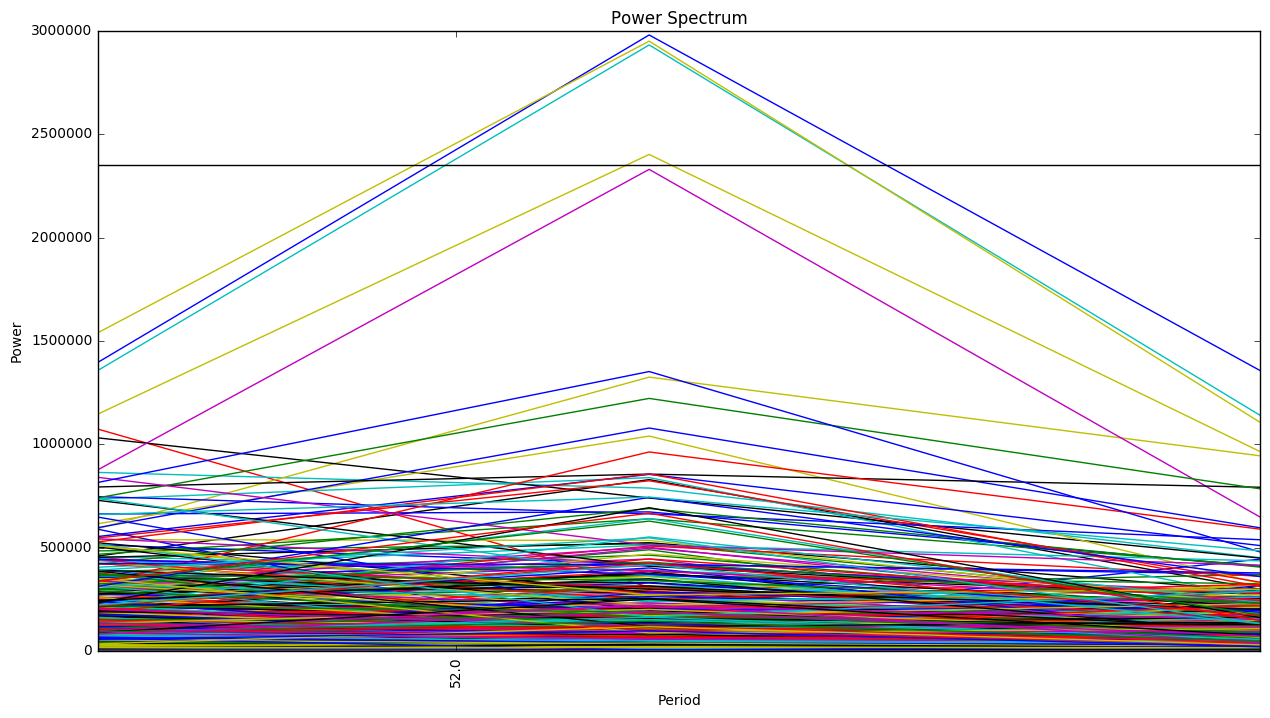

In [98]:
index = []
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
for i in range(len(mta_sumbyridetype)):
    f = np.abs(np.fft.rfft(mta_sumbyridetype[i]))
    ax.plot(np.fft.rfftfreq(r, 1.0)[1:], (f[1:]))
    if f[4] > 2.35e6:
        index.append(i)
ax.plot((1./60, 1./40), (2.35e6, 2.35e6), 'k-')
ax.set_xticks(allperiods)
ax.set_xticklabels([ "%s"%(1/x) for x in allperiods], rotation=90)
ax.set_xlim(1./60, 1./40)
ax.set_xlabel('Period')
ax.set_ylabel('Power')
ax.set_title('Power Spectrum')
print (index)

#### The index : 0,150,194 and 327.

# Figure10: Zoom in of Figure9

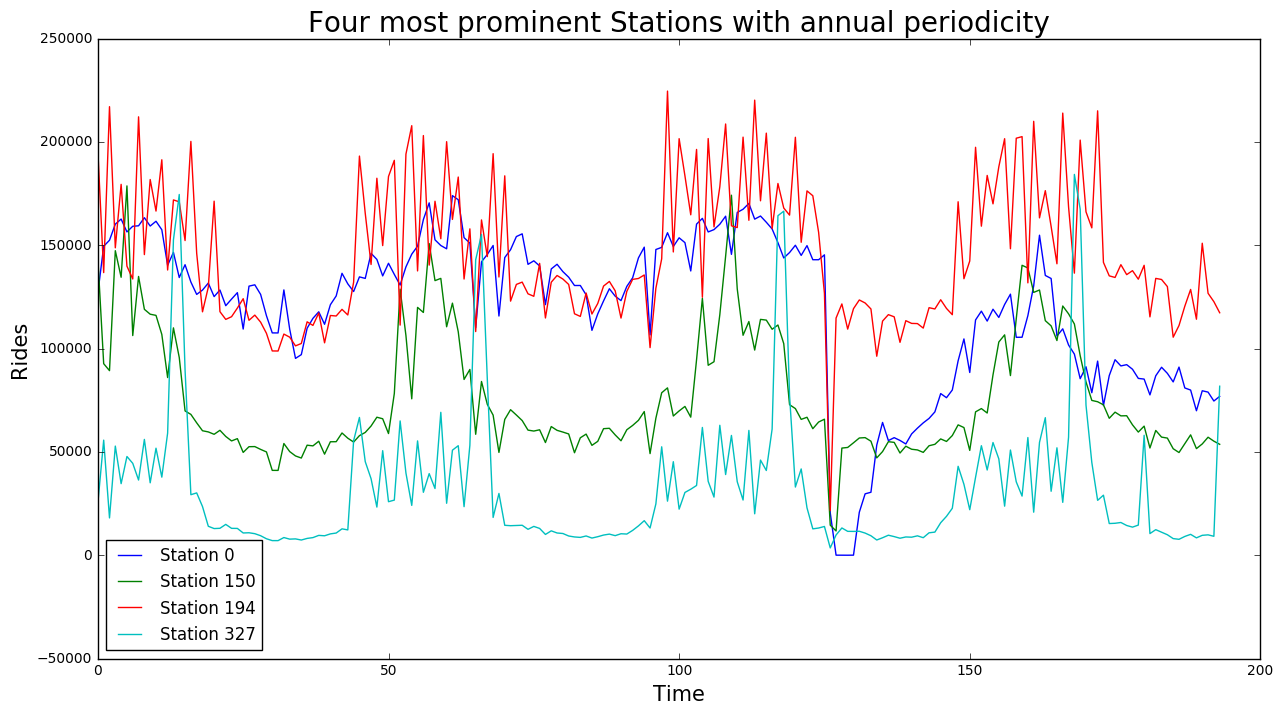

In [99]:
pl.figure(figsize=(15,8))
for i in index:
    pl.plot(mta_sumbyridetype[i], label='Station %s'%i)
pl.xlabel('Time', fontsize=15)
pl.ylabel('Rides', fontsize=15)
pl.title('Four most prominent Stations with annual periodicity', fontsize=20)
pl.legend(loc='best')

# Figure 11:Four most prominent Stations with annual periodicity